In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('b2w.csv')
df.head()

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,11955,Bem macio e felpudo...recomendo. Preço imbatí...,bem macio e felpudo...recomendo. preco imbati...,"['bem', 'macio', 'felpudo', 'recomendo', 'prec...",1.0,4,1,1
1,35478,Produto excepcional! recomendo!!! inovador e ...,produto excepcional! recomendo!!! inovador e ...,"['produto', 'excepcional', 'recomendo', 'inova...",1.0,5,1,1
2,122760,recebi o produto antes do prazo mas veio com d...,recebi o produto antes do prazo mas veio com d...,"['recebi', 'produto', 'antes', 'do', 'prazo', ...",0.0,1,1,1
3,17114,Bom custo beneficio. Adequado para pessoas que...,bom custo beneficio. adequado para pessoas que...,"['bom', 'custo', 'beneficio', 'adequado', 'par...",1.0,5,1,1
4,19112,Além de higiênico tem o tamanho ideal. Só falt...,alem de higienico tem o tamanho ideal. so falt...,"['alem', 'de', 'higienico', 'tem', 'tamanho', ...",NaN,3,-1,1


In [3]:
df.drop(['original_index', 'review_text_processed','review_text_tokenized', 'rating',	'kfold_polarity',	'kfold_rating'], axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132373 entries, 0 to 132372
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_text  132373 non-null  object 
 1   polarity     116058 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.0+ MB


In [5]:
df.dropna(axis=0, inplace=True)

In [6]:
df.drop_duplicates(inplace=True)

<Axes: xlabel='polarity', ylabel='count'>

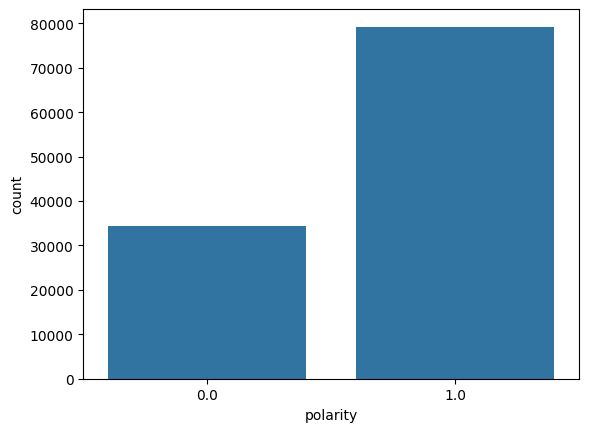

In [8]:
import seaborn as sns

sns.countplot(df, x="polarity")

In [9]:
df[df['polarity'] == 0].shape

(34430, 2)

In [10]:
positivos = df[df['polarity'] == 1].sample(34430)
negativos = df[df['polarity'] == 0]

df = pd.concat([positivos, negativos])
df.shape

(68860, 2)

In [12]:
from wordcloud import WordCloud
%matplotlib inline

In [15]:
def gerar_word_cloud(df, coluna):
    palavras = ' '.join([text for text in df[coluna]])
    word_cloud = \
        WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(palavras)

    plt.figure(figsize=(10,7))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

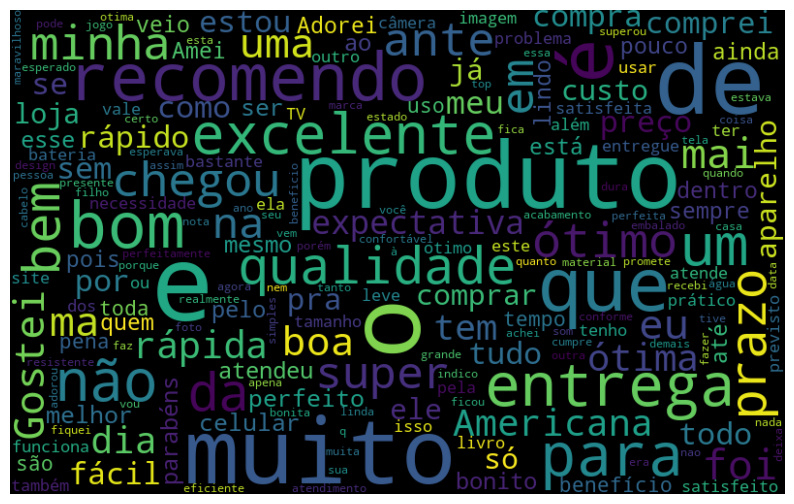

In [16]:
gerar_word_cloud(positivos, 'review_text')

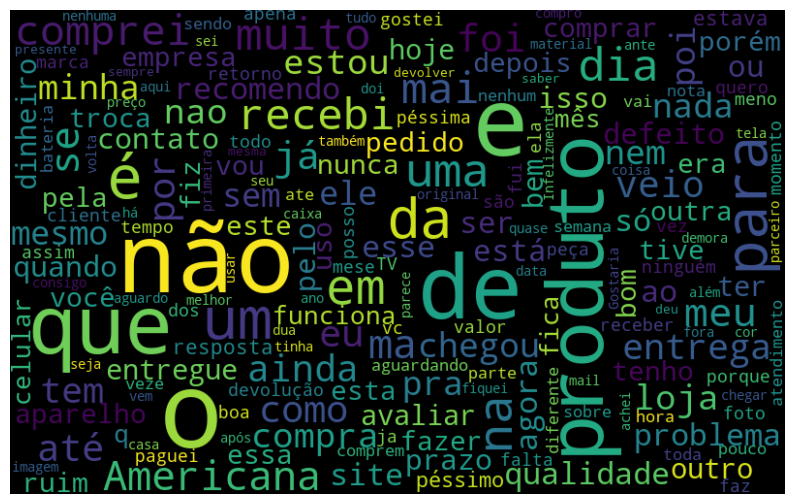

In [17]:
gerar_word_cloud(negativos, 'review_text')

## Tratamentos

In [18]:
import nltk 

def tokenizer(df, coluna, lower=True):
    tokenizer = nltk.tokenize.WordPunctTokenizer()
    palavras = ' '.join([text.lower() if lower else text for text in df[coluna]])
    return tokenizer.tokenize(palavras)

In [19]:
tokenized_data = tokenizer(df, 'review_text')
frequency = nltk.FreqDist(tokenized_data)

frequency = pd.DataFrame({
    'word': list(frequency.keys()),
    'frequency': list(frequency.values())
})
frequency.sort_values(by='frequency', ascending=False)

,word,frequency
5,.,104852
21,",",100022
17,o,65302
58,e,63130
42,a,53072
...,...,...
23646,certifiquem,1
23644,fize,1
23640,pesssimo,1
23639,solucinou,1


In [23]:
import string
import unidecode

nltk.download('stopwords')

puncts = [punct for punct in string.punctuation]
stopwords = list(set([unidecode.unidecode(stopword) for stopword in nltk.corpus.stopwords.words('portuguese')]))
stopwords_puncts = sorted(stopwords + puncts)
print(stopwords_puncts)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', 'a', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'ate', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'eramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'estamos', 'estao', 'estar', 'estas', 'estava', 'estavam', 'estavamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estiveramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivessemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'foramos', 'forem', 'formos', 'fosse', 'fossem', 'fossemos', 'fui', 'ha', 'haja', 'hajam', 'hajamos', 'hao', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houveram', 'houveramos', 'houverao', 'houverei', 'houver

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pnferreira-m1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
stopwords_puncts.remove('nao')


In [25]:
def remover_stopwords_acentos_pontuacoes_lower(df, coluna):
    word_punct_tokenizer = nltk.tokenize.WordPunctTokenizer()
    treated_text = []
    for review in df[coluna]:
        tokenized_review = word_punct_tokenizer.tokenize(review)

        treated_review = []
        for word in tokenized_review:
            treated_word = unidecode.unidecode(word.lower())
            if treated_word not in stopwords_puncts:
                treated_review.append(treated_word)
        treated_text.append(' '.join(treated_review))

    return treated_text

In [27]:
df['trat1'] = remover_stopwords_acentos_pontuacoes_lower(df, 'review_text')
df.head()

,review_text,polarity,trat1
18946,poderiam melhorar preço do frete. Quanto ao pr...,1.0,poderiam melhorar preco frete quanto produto m...
113125,Ótimo produto. corresponde ao que o fabricante...,1.0,otimo produto corresponde fabricante apresenta
88672,"O produto é excelente, atendeu as minha expect...",1.0,produto excelente atendeu expectativas
51637,Além de ser um livro super completo... que aux...,1.0,alem livro super completo ... auxilia demais t...
66582,Ótimo produto ate agora funcionando perfeitame...,1.0,otimo produto agora funcionando perfeitamente ...


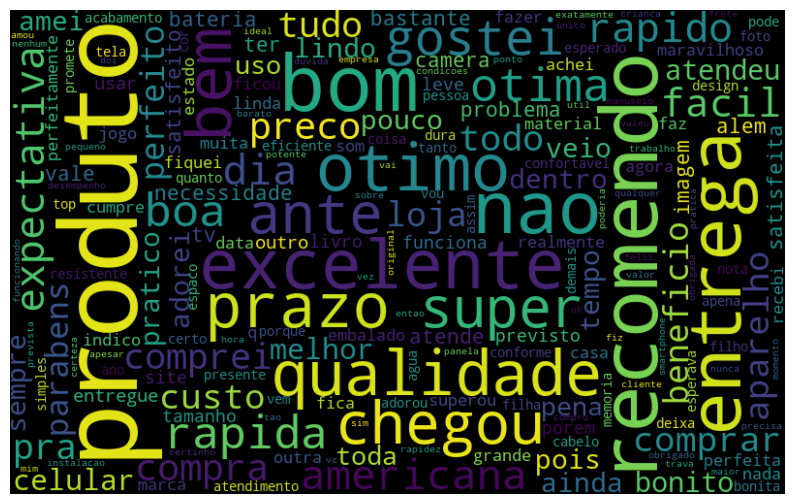

In [29]:
gerar_word_cloud(df[df['polarity'] == 1], 'trat1')

In [32]:
def stemmizer(df, coluna):
    whitespace_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    stemmer = nltk.RSLPStemmer()

    treated_data = []
    for review in df[coluna]:
        tokenized_review = whitespace_tokenizer.tokenize(review)
        treated_review = []
        for word in tokenized_review:
            treated_review.append(stemmer.stem(word))
        treated_data.append(' '.join(treated_review))
    return treated_data



In [33]:
df['trat2'] = stemmizer(df, 'trat1')

In [34]:
df.head()

,review_text,polarity,trat1,trat2
18946,poderiam melhorar preço do frete. Quanto ao pr...,1.0,poderiam melhorar preco frete quanto produto m...,pod melhor prec fret quant produt meuit bom
113125,Ótimo produto. corresponde ao que o fabricante...,1.0,otimo produto corresponde fabricante apresenta,otim produt correspond fabric apresent
88672,"O produto é excelente, atendeu as minha expect...",1.0,produto excelente atendeu expectativas,produt excel atend expect
51637,Além de ser um livro super completo... que aux...,1.0,alem livro super completo ... auxilia demais t...,alem livr sup complet ... auxil demal tant nut...
66582,Ótimo produto ate agora funcionando perfeitame...,1.0,otimo produto agora funcionando perfeitamente ...,otim produt agor funcion perfeit recom


In [39]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(lowercase = False, max_features=100)
bag_of_words_fit = count_vectorizer.fit(df['trat2'])
bag_of_words = count_vectorizer.transform(df['trat2'])

words = bag_of_words_fit.get_feature_names_out()
df_palavras = pd.DataFrame(bag_of_words.toarray())
df_palavras.columns = words

df_palavras.head()

,acab,ach,ador,agor,aguard,aind,alem,algum,americ,ant,...,troc,tud,tv,us,uso,val,vei,vend,vez,vou
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bag_of_words, df['polarity'], random_state=42)



In [41]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(random_state=42)


In [42]:
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
from sklearn.metrics import classification_report

y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      8693
         1.0       0.90      0.89      0.90      8522

    accuracy                           0.90     17215
   macro avg       0.90      0.90      0.90     17215
weighted avg       0.90      0.90      0.90     17215



In [49]:
df_testar = pd.DataFrame({'review': ['bem legal, gostei', 'muito estranho'], 'polarity':[1,0]})

df_testar['trat1'] = remover_stopwords_acentos_pontuacoes_lower(df_testar, 'review')
df_testar['trat2'] = stemmizer(df_testar, 'trat1')

bag_of_words_testar = count_vectorizer.transform(df_testar['trat2'])

In [50]:
modelo.predict(bag_of_words_testar)

array([1., 1.])